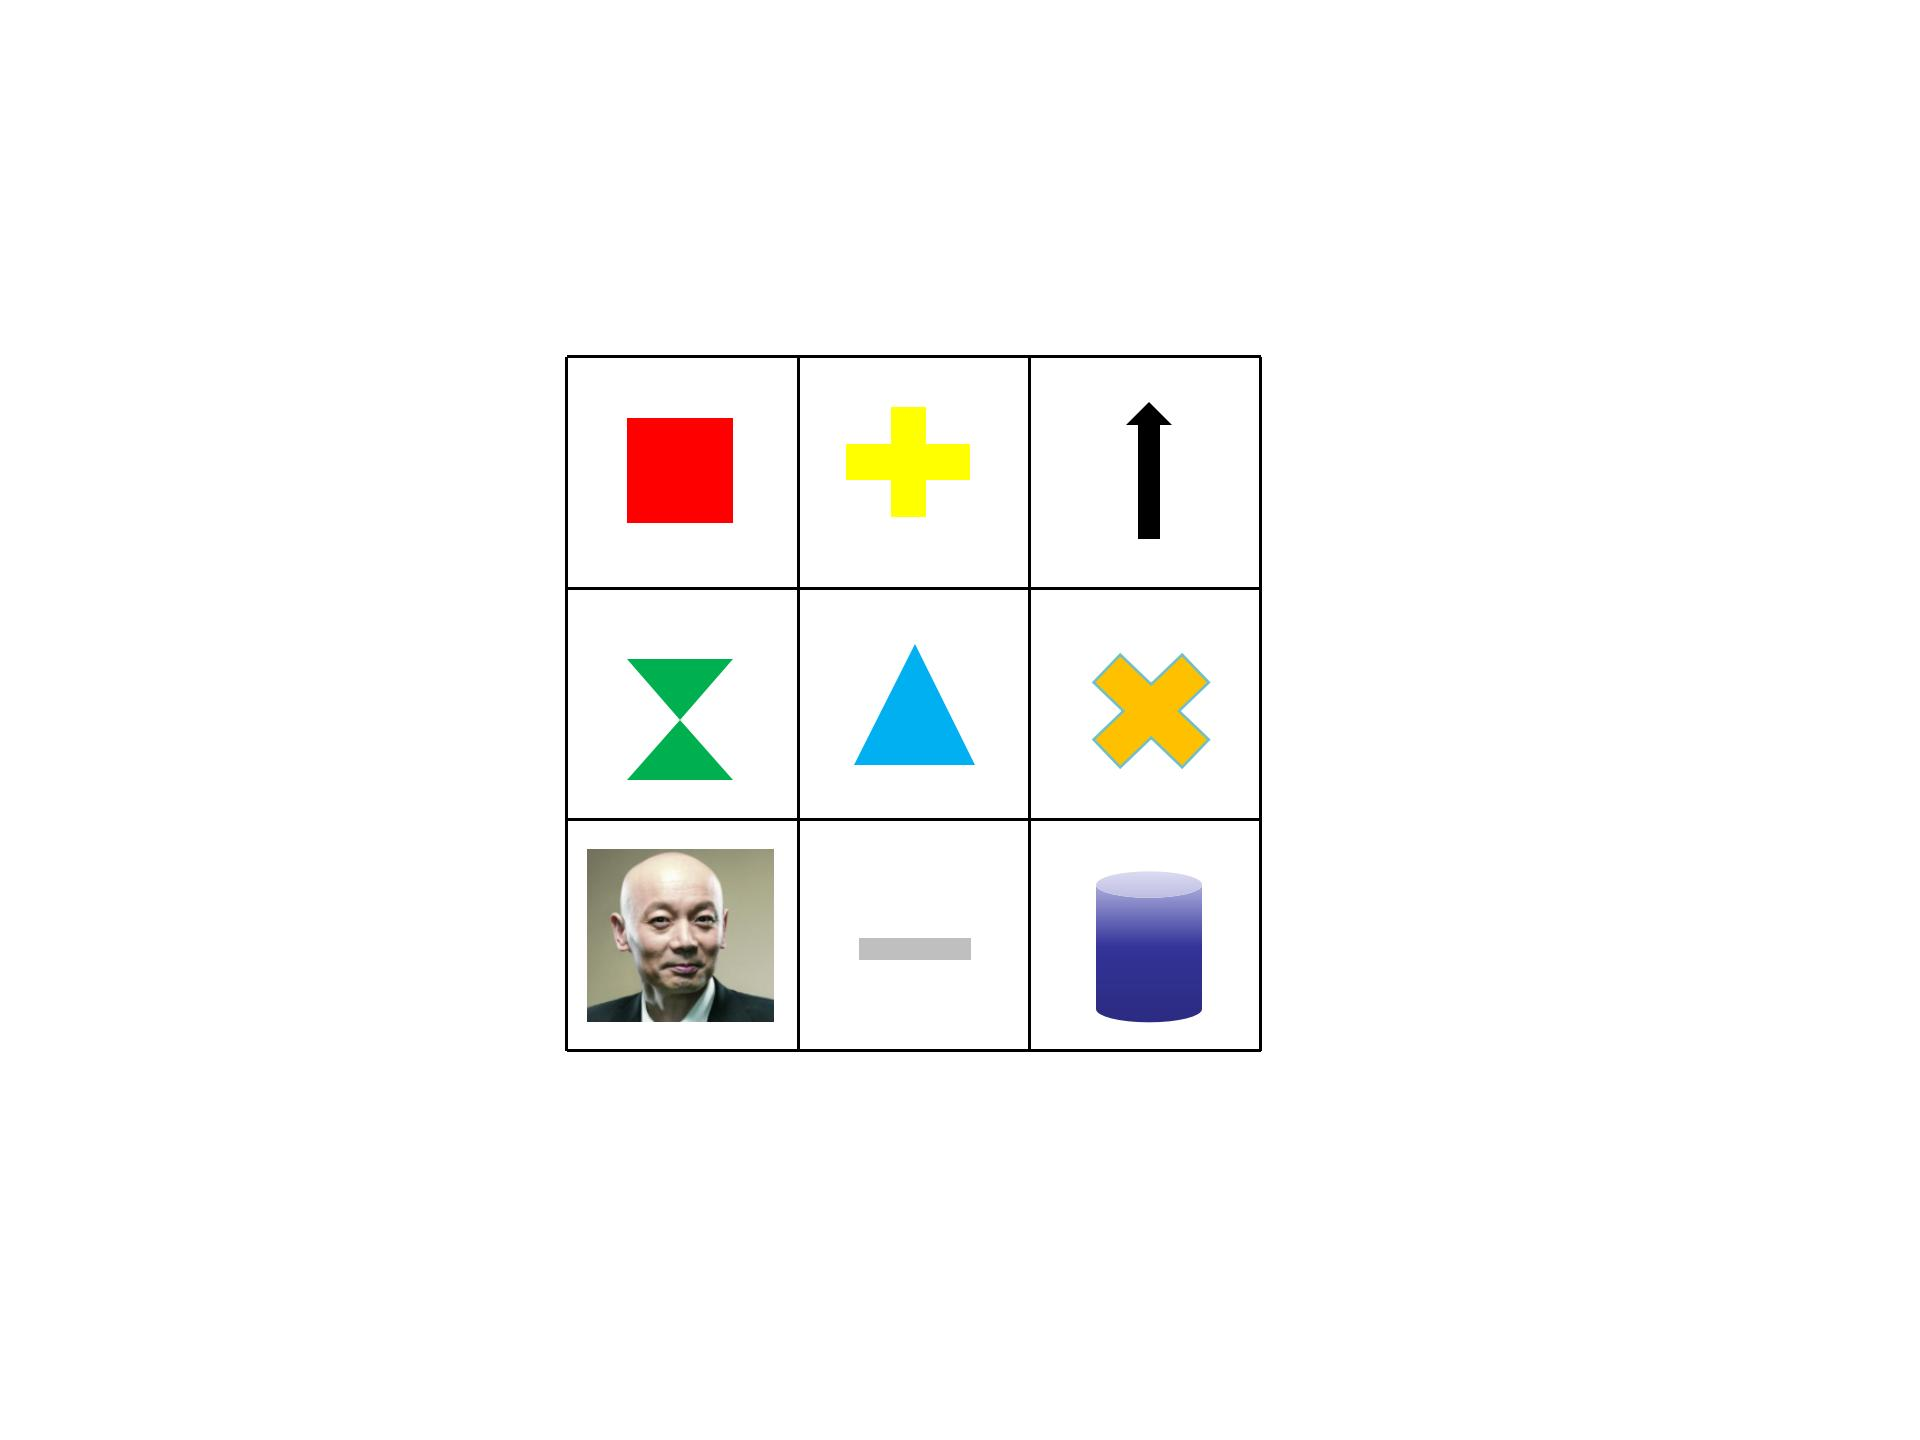

In [ ]:
#import everything needed from the beginning
import requests
from bs4 import BeautifulSoup
import json
import time
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML, Image
from jupyter_ui_poll import ui_events

#add buttons
event_info = {
    'type': '',
    'description': '',
    'time': -1
}

def wait_for_event(timeout=-1, interval=0.001, max_rate=20, allow_interupt=True):    
    start_wait = time.time()

    event_info['type'] = ""
    event_info['description'] = ""
    event_info['time'] = -1

    n_proc = int(max_rate*interval)+1
    
    with ui_events() as ui_poll:
        keep_looping = True
        while keep_looping==True:
            # process UI events
            ui_poll(n_proc)

            # end loop if we have waited more than the timeout period
            if (timeout != -1) and (time.time() > start_wait + timeout):
                keep_looping = False
                
            # end loop if event has occured
            if allow_interupt==True and event_info['description']!="":
                keep_looping = False
                
            # add pause before looping
            # to check events again
            time.sleep(interval)
    
    # return event description after wait ends
    # will be set to empty string '' if no event occured
    return event_info

# this function lets buttons register events when clicked
def register_event(btn):
    # display button description in output area
    event_info['type'] = "click"
    event_info['description'] = btn.description
    event_info['time'] = time.time()
    return 
    
#greeting
print("Welcome to the memory test.")
time.sleep(1.5)
clear_output(wait=False)

#request an anonymised user id using the following guidance:
id_instructions = """

Enter your anonymised ID

To generate an anonymous 4-letter unique user identifier please enter:

- two letters based on the initials (first and last name) of a childhood friend

- two letters based on the initials (first and last name) of a favourite actor / actress

e.g. if your friend was called Charlie Brown and film star was Tom Cruise

then your unique identifer would be CBTC

"""

print(id_instructions)

user_id = input("> ")

print("User entered id:", user_id)
time.sleep(1.5)
clear_output(wait=False)
#quick introduction to the game
print("Grids filled with colored patterns will be shown for 20 seconds, \nyour job is to memorise as much detail as possible and answer questions.")
time.sleep(5)
clear_output(wait=False)
print("There will be, in total, 3 grids appearing in order of rising difficulty! \nRemember that both time and accuracy will be taken into account.")
time.sleep(5)
clear_output(wait=False)
#Disclaimer
data_consent_info = """DATA CONSENT INFORMATION:

Please read:

we wish to record your response data

to an anonymised public data repository.

Your data will be used for educational teaching purposes

practising data analysis and visualisation.

Please type yes in the box below if you consent to the upload."""
print(data_consent_info)
result = input("> ")
clear_output(wait=False)
if result == "yes":
    print("Thanks for your participation.")
    print("Please contact philip.lewis@ucl.ac.uk")
    print("If you have any questions or concerns")
    print("regarding the stored results.")
else:
# end code execution by raising an exception
    raise(Exception("User did not consent to continue test."))
    
#collect user info for data analysis
Ans1=input("What's your gender?")
Ans2=input("What's your age?")
Ans3=input("Have you drunken alcohol or coffee before the test? If so, please type whatever you drank. Else, type neither.")
#be prepared for the game
response=input("enter anything if you are ready to go:")
clear_output(wait=False)
# game will be scored in two aspects: 1.time used to answer all questions 2.accuracy
mark=90
#first grid is displayed and disappeared
grid1=Image("grid1.jpg", width=600)
display(grid1)
time.sleep(20)
clear_output(wait=False)
#answer questions and start counting time
start_time1=time.time()

#button for Q1
#1. add button names
btn1 = widgets.Button(description="black")
btn2 = widgets.Button(description="blue")
btn3 = widgets.Button(description="yellow")
btn4 = widgets.Button(description="red")
#2. call register_event function when clicked
btn1.on_click(register_event) 
btn2.on_click(register_event) 
btn3.on_click(register_event) 
btn4.on_click(register_event)
#3. set questions and conditions in HTML
myhtml1 = HTML("<h1>What color was the square?</h1>")
display(myhtml1)
myhtml2 = HTML("<h2>You have 5 seconds to answer</h2>")
display(myhtml2)
#display buttons in a horizontal box
panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)
#timelimit，5s maximum
result = wait_for_event(timeout=5)
clear_output()
#responses for right or wrong answers
if result['description']=="red":
    print("correct! let's move on!")
elif result['description']=="":
    print("time's up! move on to next question!")
    mark=mark-10
else:
    print("Unlucky! But move on please.")
    mark=mark-10
#construct variable to be used in Google Form
ans1=result['description']

#button for Q2
#1. add button names
btn1 = widgets.Button(description="circle")
btn2 = widgets.Button(description="square")
btn3 = widgets.Button(description="semi-circle")
btn4 = widgets.Button(description="I did not see the head")
#2. call register_event function when clicked
btn1.on_click(register_event) 
btn2.on_click(register_event) 
btn3.on_click(register_event) 
btn4.on_click(register_event)
#3. set questions and conditions in HTML
myhtml1 = HTML("<h1>What shape was the man's head?</h1>")
display(myhtml1)
myhtml2 = HTML("<h2>You have 5 seconds to answer</h2>")
display(myhtml2)
#display buttons in a horizontal box
panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)
#timelimit，5s maximum
result = wait_for_event(timeout=5)
clear_output()
#responses for right or wrong answers
if result['description']=="circle":
    print("correct! let's move on!")
elif result['description']=="":
    print("time's up! move on to next question!")
    mark=mark-10
else:
    print("Unlucky! But move on please.")
    mark=mark-10
ans2=result['description']
    
#button for Q3
#1. add button names
btn1 = widgets.Button(description="1")
btn2 = widgets.Button(description="2")
btn3 = widgets.Button(description="3")
btn4 = widgets.Button(description="4")
#2. call register_event function when clicked
btn1.on_click(register_event) 
btn2.on_click(register_event) 
btn3.on_click(register_event) 
btn4.on_click(register_event)
#3. set questions and conditions in HTML
myhtml1 = HTML("<h1>How many mathematics operative symbols were displayed?</h1>")
display(myhtml1)
myhtml2 = HTML("<h2>You have 5 seconds to answer</h2>")
display(myhtml2)
#display buttons in a horizontal box
panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)
#timelimit，5s maximum
result = wait_for_event(timeout=5)
clear_output()
#responses for right or wrong answers
if result['description']=="3":
    print("correct! let's move on!")
elif result['description']=="":
    print("time's up! move on to next question!")
    mark=mark-10
else:
    print("Unlucky! But move on please.")
    mark=mark-10
ans3=result['description']

#button for Q4
#1. add button names
btn1 = widgets.Button(description="square")
btn2 = widgets.Button(description="cross")
btn3 = widgets.Button(description="rectangle")
btn4 = widgets.Button(description="man's head")
#2. call register_event function when clicked
btn1.on_click(register_event) 
btn2.on_click(register_event) 
btn3.on_click(register_event) 
btn4.on_click(register_event)
#3. set questions and conditions in HTML
myhtml1 = HTML("<h1>What is the figure on top left?</h1>")
display(myhtml1)
myhtml2 = HTML("<h2>You have 5 seconds to answer</h2>")
display(myhtml2)
#display buttons in a horizontal box
panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)
#timelimit，5s maximum
result = wait_for_event(timeout=5)
clear_output()
#responses for right or wrong answers
if result['description']=="square":
    print("correct! let's move on!")
elif result['description']=="":
    print("time's up! move on to next question!")
    mark=mark-10
else:
    print("Unlucky! But move on please.")
    mark=mark-10
ans4=result['description']

#button for Q5
#1. add button names
btn1 = widgets.Button(description="arrow")
btn2 = widgets.Button(description="cross")
btn3 = widgets.Button(description="rectangle")
btn4 = widgets.Button(description="circle")
#2. call register_event function when clicked
btn1.on_click(register_event) 
btn2.on_click(register_event) 
btn3.on_click(register_event) 
btn4.on_click(register_event)
#3. set questions and conditions in HTML
myhtml1 = HTML("<h1>What is the figure on top right?</h1>")
display(myhtml1)
myhtml2 = HTML("<h2>You have 5 seconds to answer</h2>")
display(myhtml2)
#display buttons in a horizontal box
panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)
#timelimit，5s maximum
result = wait_for_event(timeout=5)
clear_output()
#responses for right or wrong answers
if result['description']=="arrow":
    print("correct! The next grid is coming!")
elif result['description']=="":
    print("time's up! The next grid is coming!")
    mark=mark-10
else:
    print("Unlucky! The next grid is coming.")
    mark=mark-10
    
ans5=result['description']

final_time1=time.time()
time_used1=final_time1-start_time1
time.sleep(3)
clear_output(wait=False)


#second grid is displayed and disappeared
grid2=Image("grid2.jpg",width=600)
display(grid2)
time.sleep(20)
clear_output(wait=False)
#answer questions and start counting time
start_time2=time.time()

#button for Q6
#1. add button names
btn1 = widgets.Button(description="1")
btn2 = widgets.Button(description="2")
btn3 = widgets.Button(description="3")
btn4 = widgets.Button(description="4")
#2. call register_event function when clicked
btn1.on_click(register_event) 
btn2.on_click(register_event) 
btn3.on_click(register_event) 
btn4.on_click(register_event)
#3. set questions and conditions in HTML
myhtml1 = HTML("<h1>How many mathematics operative symbols were there?</h1>")
display(myhtml1)
myhtml2 = HTML("<h2>You have 8 seconds to answer</h2>")
display(myhtml2)
#display buttons in a horizontal box
panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)
#timelimit，8s maximum
result = wait_for_event(timeout=8)
clear_output()
#responses for right or wrong answers
if result['description']=="3":
    print("correct! let's move on!")
elif result['description']=="":
    print("time's up! move on to next question!")
    mark=mark-5
else:
    print("Unlucky! But move on please.")
    mark=mark-5 
#grid one, two, three are harder and harder. So, the punishment is weaker
ans6=result['description']

#button for Q7
#1. add button names
btn1 = widgets.Button(description="triangle")
btn2 = widgets.Button(description="square")
btn3 = widgets.Button(description="pentagon")
btn4 = widgets.Button(description="star")
#2. call register_event function when clicked
btn1.on_click(register_event) 
btn2.on_click(register_event) 
btn3.on_click(register_event) 
btn4.on_click(register_event)
#3. set questions and conditions in HTML
myhtml1 = HTML("<h1>Which figure is in the middle?</h1>")
display(myhtml1)
myhtml2 = HTML("<h2>You have 8 seconds to answer</h2>")
display(myhtml2)
#display buttons in a horizontal box
panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)
#timelimit，8s maximum
result = wait_for_event(timeout=8)
clear_output()
#responses for right or wrong answers
if result['description']=="pentagon":
    print("correct! let's move on!")
elif result['description']=="":
    print("time's up! move on to next question!")
    mark=mark-5
else:
    print("Unlucky! But move on please.")
    mark=mark-5 
ans7=result['description']

#button for Q8
#1. add button names
btn1 = widgets.Button(description="1")
btn2 = widgets.Button(description="2")
btn3 = widgets.Button(description="3")
btn4 = widgets.Button(description="4")
#2. call register_event function when clicked
btn1.on_click(register_event) 
btn2.on_click(register_event) 
btn3.on_click(register_event) 
btn4.on_click(register_event)
#3. set questions and conditions in HTML
myhtml1 = HTML("<h1>How many circles were there?</h1>")
display(myhtml1)
myhtml2 = HTML("<h2>You have 8 seconds to answer</h2>")
display(myhtml2)
#display buttons in a horizontal box
panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)
#timelimit，8s maximum
result = wait_for_event(timeout=8)
clear_output()
#responses for right or wrong answers
if result['description']=="2":
    print("correct! let's move on!")
elif result['description']=="":
    print("time's up! move on to next question!")
    mark=mark-5
else:
    print("Unlucky! But move on please.")
    mark=mark-5     
ans8=result['description']

#button for Q9
#1. add button names
btn1 = widgets.Button(description="circle")
btn2 = widgets.Button(description="heart")
btn3 = widgets.Button(description="triangle")
btn4 = widgets.Button(description="cross/plus")
#2. call register_event function when clicked
btn1.on_click(register_event) 
btn2.on_click(register_event) 
btn3.on_click(register_event) 
btn4.on_click(register_event)
#3. set questions and conditions in HTML
myhtml1 = HTML("<h1>What is the figure on top left?</h1>")
display(myhtml1)
myhtml2 = HTML("<h2>You have 8 seconds to answer</h2>")
display(myhtml2)
#display buttons in a horizontal box
panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)
#timelimit，8s maximum
result = wait_for_event(timeout=8)
clear_output()
#responses for right or wrong answers
if result['description']=="cross/plus":
    print("correct! let's move on!")
elif result['description']=="":
    print("time's up! move on to next question!")
    mark=mark-5
else:
    print("Unlucky! But move on please.")
    mark=mark-5   
ans9=result['description']

#button for Q10
#1. add button names
btn1 = widgets.Button(description="circle")
btn2 = widgets.Button(description="heart")
btn3 = widgets.Button(description="triangle")
btn4 = widgets.Button(description="divide symbol")
#2. call register_event function when clicked
btn1.on_click(register_event) 
btn2.on_click(register_event) 
btn3.on_click(register_event) 
btn4.on_click(register_event)
#3. set questions and conditions in HTML
myhtml1 = HTML("<h1>What is the figure on top right?</h1>")
display(myhtml1)
myhtml2 = HTML("<h2>You have 8 seconds to answer</h2>")
display(myhtml2)
#display buttons in a horizontal box
panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)
#timelimit，8s maximum
result = wait_for_event(timeout=8)
clear_output()
#responses for right or wrong answers
if result['description']=="circle":
    print("correct! The final grid is coming!")
elif result['description']=="":
    print("time's up! The final grid is coming!")
    mark=mark-5
else:
    print("Unlucky! The final grid is coming.")
    mark=mark-5  
    
ans10=result['description']   

final_time2=time.time()
time_used2=final_time2-start_time2
time.sleep(3)
clear_output(wait=False)

#third grid is displayed and disappeared
grid3=Image("grid3.jpg",width=600)
display(grid3)
time.sleep(20)
clear_output(wait=False)
#answer questions and start counting time
start_time3=time.time()
#button for Q11
#1. add button names
btn1 = widgets.Button(description="sphere")
btn2 = widgets.Button(description="square")
btn3 = widgets.Button(description="triangle")
btn4 = widgets.Button(description="star")
#2. call register_event function when clicked
btn1.on_click(register_event) 
btn2.on_click(register_event) 
btn3.on_click(register_event) 
btn4.on_click(register_event)
#3. set questions and conditions in HTML
myhtml1 = HTML("<h1>What was the small figure in rectangle?</h1>")
display(myhtml1)
myhtml2 = HTML("<h2>You have 10 seconds to answer</h2>")
display(myhtml2)
#display buttons in a horizontal box
panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)
#timelimit，10s maximum
result = wait_for_event(timeout=10)
clear_output()
#responses for right or wrong answers
if result['description']=="triangle":
    print("correct! let's move on!")
elif result['description']=="":
    print("time's up! move on to next question!")
    mark=mark-3
else:
    print("Unlucky! But move on please.")
    mark=mark-3#less mark punished
ans11=result['description']

#button for Q12
#1. add button names
btn1 = widgets.Button(description="1")
btn2 = widgets.Button(description="2")
btn3 = widgets.Button(description="3")
btn4 = widgets.Button(description="4")
#2. call register_event function when clicked
btn1.on_click(register_event) 
btn2.on_click(register_event) 
btn3.on_click(register_event) 
btn4.on_click(register_event)
#3. set questions and conditions in HTML
myhtml1 = HTML("<h1>How many circles were there in total?</h1>")
display(myhtml1)
myhtml2 = HTML("<h2>You have 10 seconds to answer</h2>")
display(myhtml2)
#display buttons in a horizontal box
panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)
#timelimit，10s maximum
result = wait_for_event(timeout=10)
clear_output()
#responses for right or wrong answers
if result['description']=="4":
    print("correct! let's move on!")
elif result['description']=="":
    print("time's up! move on to next question!")
    mark=mark-3
else:
    print("Unlucky! But move on please.")
    mark=mark-3
ans12=result['description']

#button for Q13
#1. add button names
btn1 = widgets.Button(description="heart")
btn2 = widgets.Button(description="diamond/kite")
btn3 = widgets.Button(description="cross/plus")
btn4 = widgets.Button(description="curved line")
#2. call register_event function when clicked
btn1.on_click(register_event) 
btn2.on_click(register_event) 
btn3.on_click(register_event) 
btn4.on_click(register_event)
#3. set questions and conditions in HTML
myhtml1 = HTML("<h1>What figure was on the top of star in the middle?</h1>")
display(myhtml1)
myhtml2 = HTML("<h2>You have 10 seconds to answer</h2>")
display(myhtml2)
#display buttons in a horizontal box
panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)
#timelimit，10s maximum
result = wait_for_event(timeout=10)
clear_output()
#responses for right or wrong answers
if result['description']=="cross/plus":
    print("correct! let's move on!")
elif result['description']=="":
    print("time's up! move on to next question!")
    mark=mark-3
else:
    print("Unlucky! But move on please.")
    mark=mark-3
ans13=result['description']

#button for Q14
#1. add button names
btn1 = widgets.Button(description="heart")
btn2 = widgets.Button(description="triangle")
btn3 = widgets.Button(description="cross/plus")
btn4 = widgets.Button(description="curved line")
#2. call register_event function when clicked
btn1.on_click(register_event) 
btn2.on_click(register_event) 
btn3.on_click(register_event) 
btn4.on_click(register_event)
#3. set questions and conditions in HTML
myhtml1 = HTML("<h1>What figure was on the bottom left?</h1>")
display(myhtml1)
myhtml2 = HTML("<h2>You have 10 seconds to answer</h2>")
display(myhtml2)
#display buttons in a horizontal box
panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)
#timelimit，10s maximum
result = wait_for_event(timeout=10)
clear_output()
#responses for right or wrong answers
if result['description']=="triangle":
    print("correct! let's move on!")
elif result['description']=="":
    print("time's up! move on to next question!")
    mark=mark-3
else:
    print("Unlucky! But move on please.")
    mark=mark-3    
ans14=result['description']

#button for Q15
#1. add button names
btn1 = widgets.Button(description="heart")
btn2 = widgets.Button(description="rhombus/diamond")
btn3 = widgets.Button(description="cross/plus")
btn4 = widgets.Button(description="square")
#2. call register_event function when clicked
btn1.on_click(register_event) 
btn2.on_click(register_event) 
btn3.on_click(register_event) 
btn4.on_click(register_event)
#3. set questions and conditions in HTML
myhtml1 = HTML("<h1>What figure was on the bottom right?</h1>")
display(myhtml1)
myhtml2 = HTML("<h2>You have 10 seconds to answer</h2>")
display(myhtml2)
#display buttons in a horizontal box
panel = widgets.HBox([btn1, btn2, btn3, btn4])
display(panel)
#timelimit，10s maximum
result = wait_for_event(timeout=10)
clear_output()
#responses for right or wrong answers
if result['description']=="rhombus/diamond":
    print("You nailed it! Result comin in 3 seconds.")
elif result['description']=="":
    print("time's up! Result comin in 3 seconds.")
    mark=mark-3
else:
    print("Oops, quite close! Results shown in 3 second.")
    mark=mark-3  
    
ans15=result['description']

final_time3=time.time()
time_used3=final_time3-start_time3
time.sleep(3)
clear_output(wait=False)

#Total time, average time, and accuracy(minimum mark value=0，maximum mark value=90)
total_time=round(time_used1+time_used2+time_used3,2)
average_time=round(total_time/15,2)
accuracy=round(mark*100/90,2)

print(f"Total time: {total_time} seconds")
print(f"Average time: {average_time} seconds")
print(f"Accuracy: {accuracy}%({mark} out of 90 marks)")

data_dict={"anonymised ID":user_id,
           "gender": Ans1,
           "age": Ans2,
           "drink": Ans3,
           "1color of the square":ans1,
           "2shape of man's head":ans2,
           "3number of math symbols":ans3,
           "4top left figure":ans4,
           "5top right figure":ans5,
           "6number of math symbols":ans6,
           "7middle figure":ans7,
           "8number of circles":ans8,
           "9top left figure":ans9,
           "10top right figure":ans10,
           "11small figure in rectangle":ans11,
           "12number of circles":ans12,
           "13figure on top of the star":ans13,
           "14bottom left figure":ans14,
           "15bottom right figure":ans15,
           "total time":total_time,
           "average time":average_time,
           "accuracy percentage":accuracy
          }

# construct send_to_google_form function
def send_to_google_form(data_dict, form_url):
    ''' Helper function to upload information to a corresponding google form 
        You are not expected to follow the code within this function!
    '''
    form_id = form_url[34:90]
    view_form_url = f'https://docs.google.com/forms/d/e/{form_id}/viewform'
    post_form_url = f'https://docs.google.com/forms/d/e/{form_id}/formResponse'

    page = requests.get(view_form_url)
    content = BeautifulSoup(page.content, "html.parser").find('script', type='text/javascript')
    content = content.text[27:-1]
    result = json.loads(content)[1][1]
    form_dict = {}
    
    loaded_all = True
    for item in result:
        if item[1] not in data_dict:
            print(f"Form item {item[1]} not found. Data not uploaded.")
            loaded_all = False
            return False
        form_dict[f'entry.{item[4][0][0]}'] = data_dict[item[1]]

    post_result = requests.post(post_form_url, data=form_dict)
    return post_result.ok
    
form_url = "https://docs.google.com/forms/d/e/1FAIpQLSfSySqQqmbQ058-ok4LMEXvfzU5_0kdkCYguRcJW9QZTKIg9g/viewform?usp=sf_link"
send_to_google_form(data_dict,form_url)